### Task 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
df=pd.read_csv("C:/Users/Vaishnavi Chavan/Downloads/archive (22)/twitter_training.csv")

In [5]:
# Top 5 records
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
# Sallow Copy
df1=df.copy()

In [7]:
df1.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

## Rename Column Name

In [9]:
df1 = df1.rename(columns={'2401': 'ID'})
df1= df1.rename(columns={'Borderlands':'Entity'})
df1=df1.rename(columns={'Positive':'Sentiment'})
df1=df1.rename(columns={'im getting on borderlands and i will murder you all ,':'Text'})

In [10]:
# Column Names
df1.columns

Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')

## Information

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Statistical Summary

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,74681.0,6432.640149,3740.423819,1.0,3195.0,6422.0,9601.0,13200.0


In [15]:
# shape of data
df1.shape

(74681, 4)

In [16]:
# Size of Data
df1.size

298724

In [17]:
# Null Values Check
df1.isnull().sum().sum()

686

In [18]:
# Remove Null Values
df1.dropna(inplace= True)

In [19]:
df1.isnull().sum().sum()

0

In [20]:
df2 = df1[['Text', 'Sentiment']]

In [21]:
df2.isnull().sum().sum()

0

In [22]:
# Function of Preprocessor text
def preprocess_text(text):
    return text

In [23]:
# Apply Function on data
df2['Text'] = df2['Text'].apply(preprocess_text)

C:\Users\Vaishnavi Chavan\AppData\Local\Temp\ipykernel_12604\4241989093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Text'] = df2['Text'].apply(preprocess_text)


## Split Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(df2["Text"],df2["Sentiment"],test_size=0.2,random_state=42)

## Vectorize the text data using TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tv = TfidfVectorizer(max_features=5000)

In [30]:
x_train_tv = tv.fit_transform(x_train)

In [31]:
x_test_tv = tv.transform(x_test)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(x_train_tv,y_train)

C:\Users\Vaishnavi Chavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_true,y_pred=y_test,lr.predict(x_test_tv)

## Accuracy Score

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_true,y_pred)*100

69.17359281032502

## Classification Report

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.67      0.53      0.59      2624
    Negative       0.72      0.78      0.75      4463
     Neutral       0.69      0.63      0.66      3589
    Positive       0.67      0.75      0.71      4123

    accuracy                           0.69     14799
   macro avg       0.69      0.67      0.68     14799
weighted avg       0.69      0.69      0.69     14799



## Visualize sentiment distribution

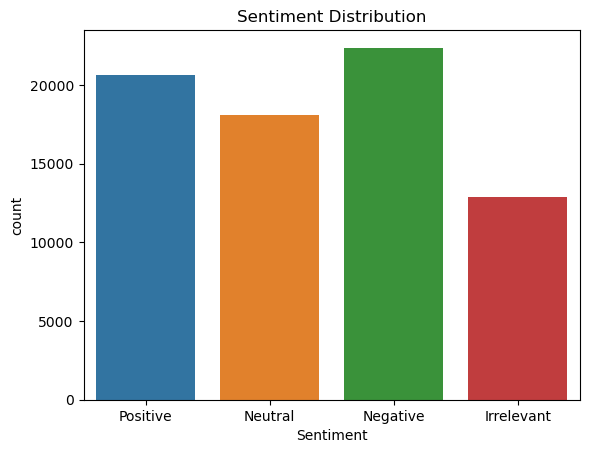

In [44]:
sns.countplot(x='Sentiment', data=df2)
plt.title('Sentiment Distribution')
plt.show()

## Visualize word cloud for each sentiment class

In [46]:
sentiments = df2['Sentiment'].unique()

In [47]:
from wordcloud import WordCloud

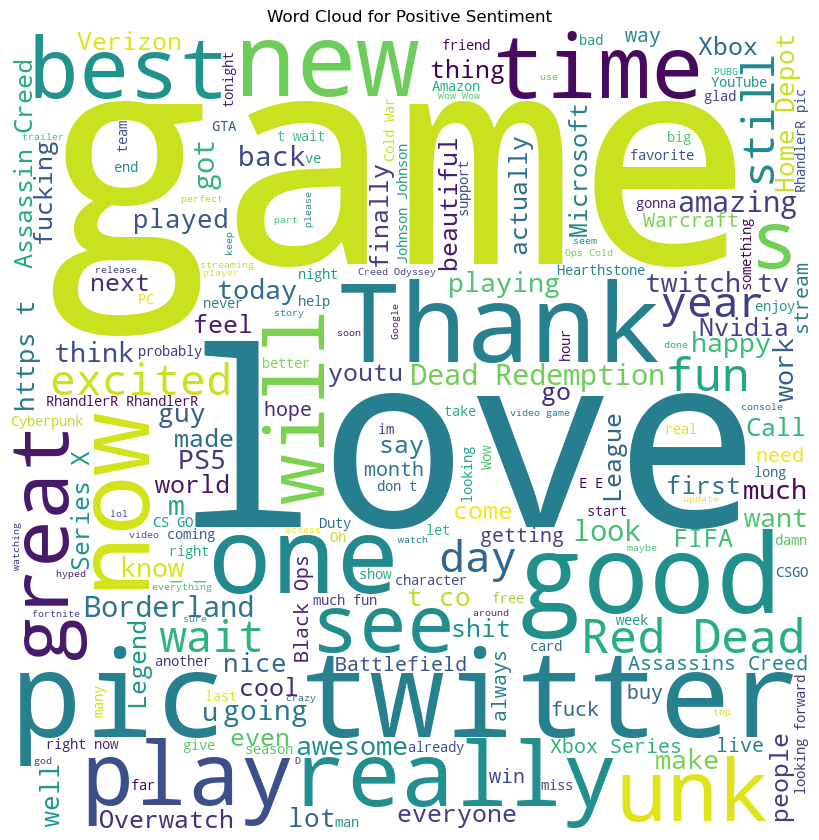

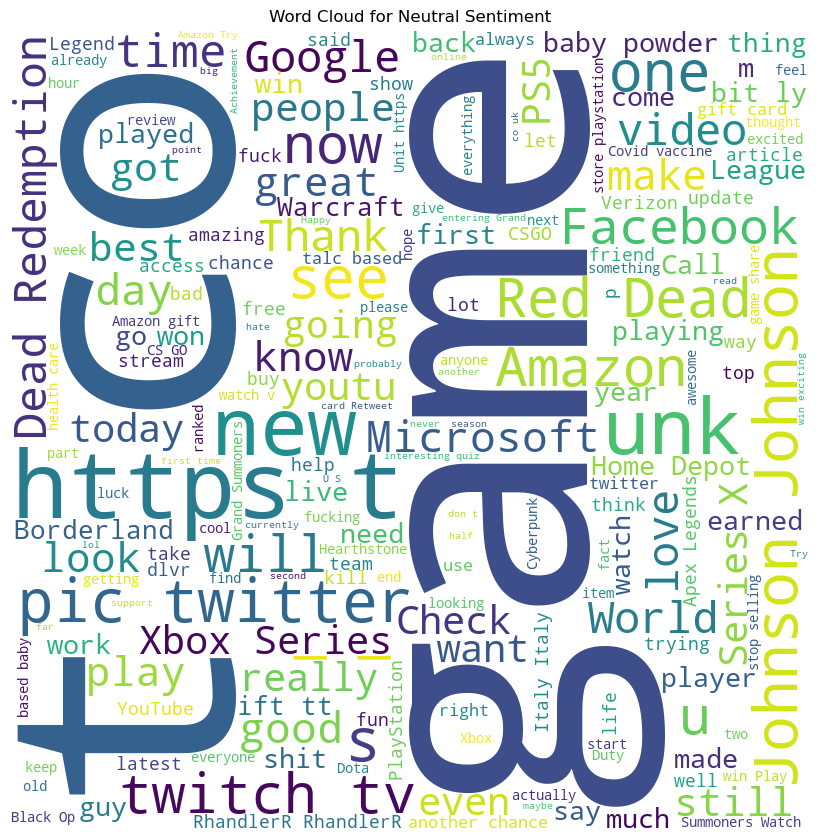

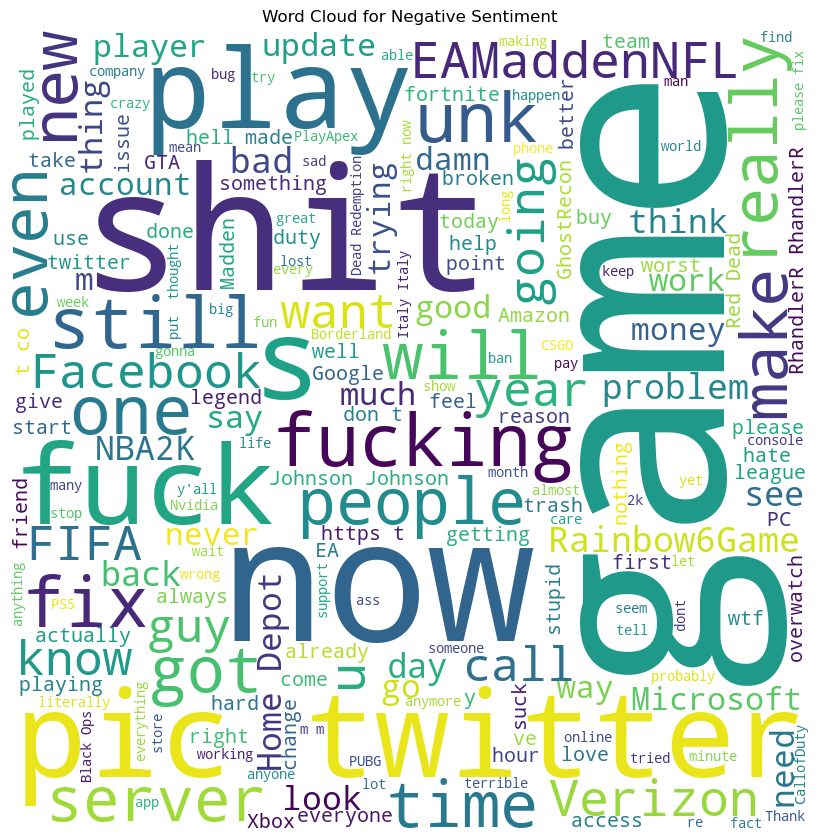

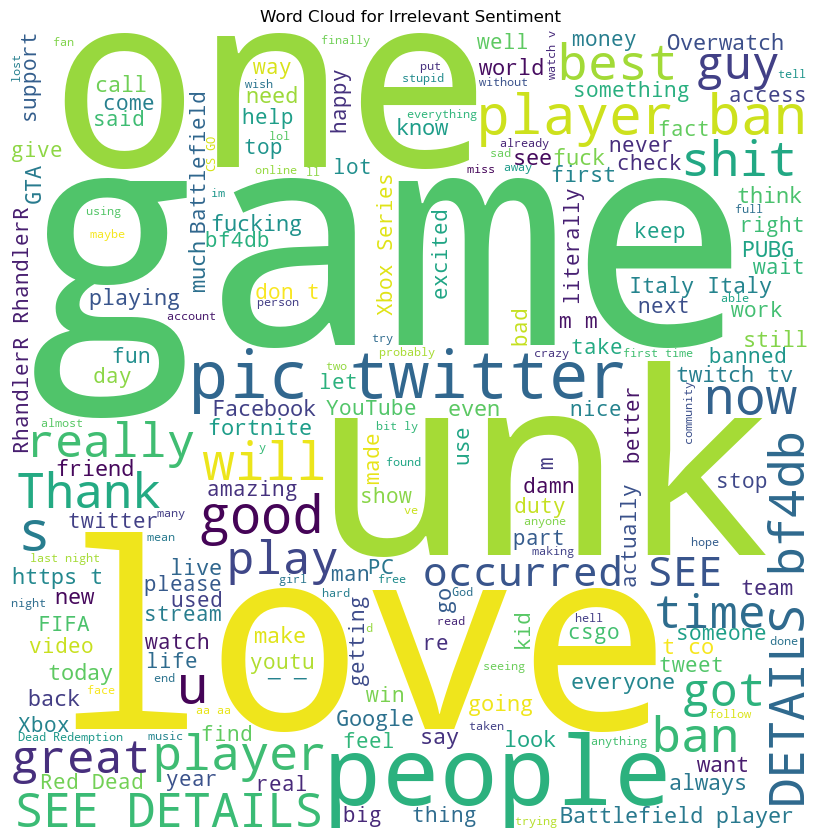

In [48]:
for sentiment in sentiments:
    text = ' '.join(df2[df2['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()